#  Simplified mathematical model of the NPQ in DIATOMS
With this Notebook I aim to reproduce the behaviour of KEA3 mutants, observed by Claire and Giovanni. 

Data visualised below.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from modelbase.ode import Model, Simulator
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [15, 9]

Could not find GLIMDA.


Experimental data are stored in 2 Excel files. Different column names and strain order. Separate data extraction

In [3]:
folder = '/home/anna/ownCloud/diatom_Jun2020/'
ml_file = str(folder + 'NPQ ML LL norm.xlsx')
data_ml= pd.read_excel(ml_file)

hl_file = str(folder + 'NPQ HL LL norm.xlsx')
data_hl= pd.read_excel(hl_file)

raw_file = str(folder + 'Raw data.xlsx')
raw= pd.read_excel(raw_file)

In [4]:
raw[:5]

Date 2020-03-03 00:00:00 2020-03-03 00:00:00.1  \
0  Light sequence            HL -> LL              HL -> LL   
1          Strain                  WT              Mutant I   
2       Nigericin             Control               Control   
3             NaN                E 21                  E 22   
4             -40                   0                     0   

  2020-03-03 00:00:00.2 2020-03-03 00:00:00.3 2020-03-03 00:00:00.4  \
0              HL -> LL              HL -> LL              HL -> LL   
1              Mutant G         Overexpressor                    WT   
2               Control               Control             Nigericin   
3                  E 23                  E 24                  E 26   
4                     0                     0                     0   

  2020-03-03 00:00:00.5 2020-03-03 00:00:00.6 2020-03-03 00:00:00.7  \
0              HL -> LL              HL -> LL              HL -> LL   
1              Mutant I              Mutant G         Overexpressor   
2             Nigericin             Nigericin             Nigericin   
3                  E 27                  E 28                  E 29   
4                     0                     0                     0   

  2020-03-03 00:00:00.8  ... 2020-03-03 00:00:00.14 2020-03-03 00:00:00.15  \
0              ML -> LL  ...               ML -> LL               ML -> LL   
1                    WT  ...               Mutant G          Overexpressor   
2               Control  ...              Nigericin              Nigericin   
3                  E 81  ...                   E 88                   E 89   
4                     0  ...                      0                      0   

  2020-03-05 00:00:00 2020-03-05 00:00:00.1 2020-03-05 00:00:00.2  \
0            HL -> LL              HL -> LL              HL -> LL   
1                  WT              Mutant I              Mutant G   
2             Control               Control               Control   
3               E 181                 E 182                 E 183   
4                   0                     0                     0   

  2020-03-05 00:00:00.3 2020-03-05 00:00:00.4 2020-03-05 00:00:00.5  \
0              HL -> LL              HL -> LL              HL -> LL   
1         Overexpressor                    WT              Mutant I   
2               Control             Nigericin             Nigericin   
3                 E 184                 E 186                 E 187   
4                     0                     0                     0   

  2020-03-05 00:00:00.6 2020-03-05 00:00:00.7  
0              HL -> LL              HL -> LL  
1              Mutant G         Overexpressor  
2             Nigericin             Nigericin  
3                 E 188                 E 189  
4                     0                     0  

[5 rows x 25 columns]

In [5]:
# keep the same colour palette
colpal = {'Mutant 1': 'limegreen',
          'Mutant I': 'limegreen',
          'Mutant 2': 'darkgreen',
          'Mutant G': 'darkgreen',
          'WT': 'red',
          'Overexpressor': 'darkcyan'}

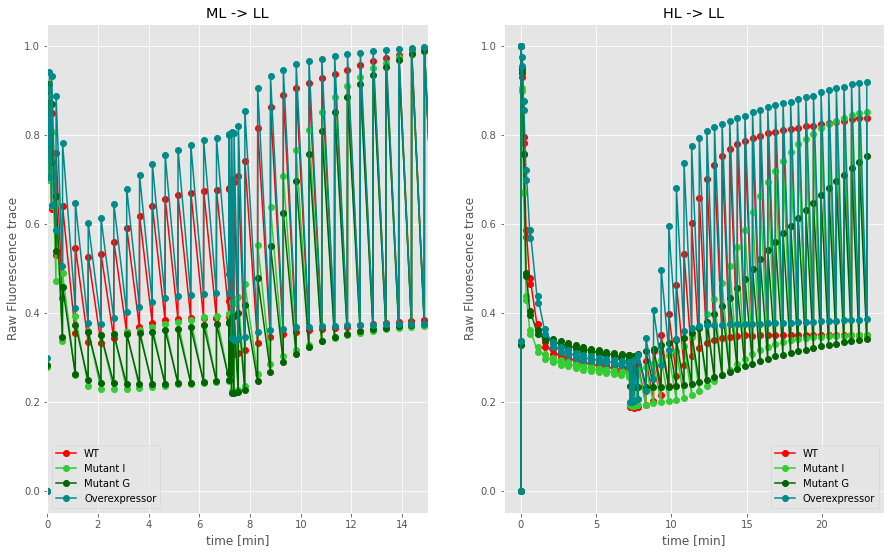

In [6]:
plt.figure()
ax1 = plt.subplot(1,2,1)
for i in raw.iloc[:,9:13].columns: # take avg. data for the first columns which are WT
    plt.plot(raw['Date'][4:]/1000./60., raw[i][4:]/max(raw[i][4:]), 
             'o-', label=raw[i][1], color=colpal[raw[i][1]])
    plt.xlabel('time [min]')
    plt.xlim(0,15)
    plt.ylabel('Raw Fluorescence trace')
    plt.title(raw[i][0])
plt.legend()
plt.subplot(1,2,2)#, sharey=ax1)
for i in raw.iloc[:,1:5].columns: # take avg. data for the first columns which are WT
    plt.plot(raw['Date'][4:]/1000./60., raw[i][4:]/max(raw[i][4:]), 
             'o-', label=raw[i][1], color=colpal[raw[i][1]])
    plt.xlabel('time [min]')
    plt.ylabel('Raw Fluorescence trace')
    plt.title(raw[i][0])
plt.legend()

In [7]:
data_ml[:5]
# data starts in row:3
# every second column is se
# first controls, then nigericin
# starts with WT

Unnamed: 0  Average Standard error Average.1 Standard error.1  \
0  Light sequence  ML ->LL        ML ->LL   ML ->LL          ML ->LL   
1          Strain       WT             WT  Mutant 1         Mutant 1   
2       Nigericin  Control        Control   Control          Control   
3               0        0              0         0                0   
4           310.5        0              0         0                0   

  Average.2 Standard error.2      Average.3 Standard error.3  Average.4  \
0   ML ->LL          ML ->LL        ML ->LL          ML ->LL    ML ->LL   
1  Mutant 2         Mutant 2  Overexpressor    Overexpressor         WT   
2   Control          Control        Control          Control  Nigericin   
3         0                0              0                0          0   
4         0                0              0                0          0   

  Standard error.4  Average.5 Standard error.5  Average.6 Standard error.6  \
0          ML ->LL    ML ->LL          ML ->LL    ML ->LL          ML ->LL   
1               WT   Mutant 1         Mutant 1   Mutant 2         Mutant 2   
2        Nigericin  Nigericin        Nigericin  Nigericin        Nigericin   
3                0          0                0          0                0   
4                0          0                0          0                0   

       Average.7 Standard error.7  
0        ML ->LL          ML ->LL  
1  Overexpressor    Overexpressor  
2      Nigericin        Nigericin  
3              0                0  
4              0                0

In [8]:
data_hl[:5]
# data starts in row:3
# every second column is se
# control, nigericin interchengably
# starts with Mutant 2

Date   Average Standard deviation  Average.1  \
0  Light sequence    HL->LL             HL->LL     HL->LL   
1          Strain  Mutant 2           Mutant 2   Mutant 2   
2       Nigericin   Control            Control  Nigericin   
3               0         0                  0          0   
4           310.5         0                  0          0   

  Standard deviation.1 Average.2 Standard deviation.2  Average.3  \
0               HL->LL    HL->LL               HL->LL     HL->LL   
1             Mutant 2  Mutant 1             Mutant 1   Mutant 1   
2            Nigericin   Control              Control  Nigericin   
3                    0         0                    0          0   
4                    0         0                    0          0   

  Standard deviation.3      Average.4 Standard deviation.4      Average.5  \
0               HL->LL         HL->LL               HL->LL         HL->LL   
1             Mutant 1  Overexpressor        Overexpressor  Overexpressor   
2            Nigericin        Control              Control      Nigericin   
3                    0              0                    0              0   
4                    0              0                    0              0   

  Standard deviation.5 Average.6 Standard deviation.6  Average.7  \
0               HL->LL    HL->LL               HL->LL     HL->LL   
1        Overexpressor        WT                   WT         WT   
2            Nigericin   Control              Control  Nigericin   
3                    0         0                    0          0   
4                    0         0                    0          0   

  Standard deviation.7  
0               HL->LL  
1                   WT  
2            Nigericin  
3                    0  
4                    0

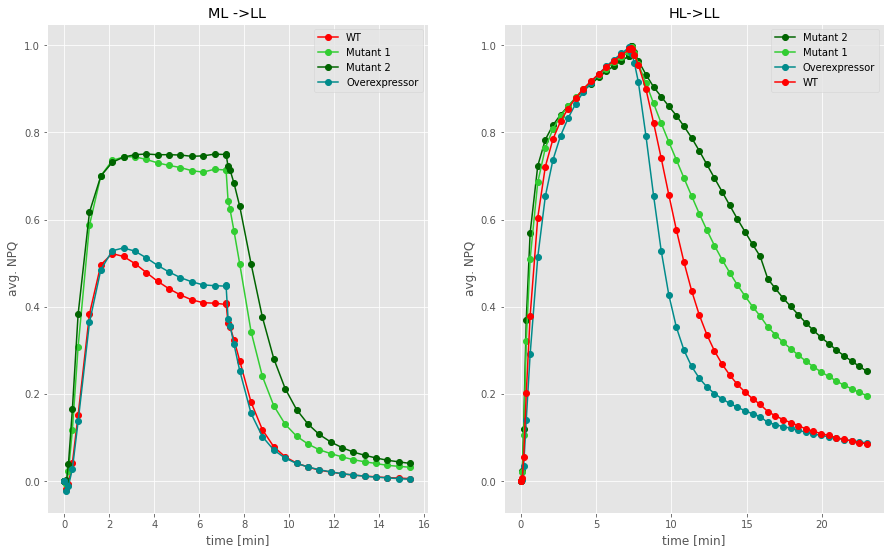

In [9]:
# use pandas iloc, which takes a row/column slice, both based on integer position and following normal python syntax 
# to visualise the data
# data_ml.iloc[::2] takes every second row from the data_ml
plt.figure()
ax1 = plt.subplot(1,2,1)
for i in data_ml.iloc[:,1:8:2].columns: # take avg. data for the first columns which are WT
    plt.plot(data_ml['Unnamed: 0'][3:]/1000./60., data_ml[i][3:], 
             'o-', label=data_ml[i][1], color=colpal[data_ml[i][1]])
    plt.xlabel('time [min]')
    plt.ylabel('avg. NPQ')
plt.title(data_ml[i][0])
plt.legend()
plt.subplot(1,2,2, sharey=ax1)
for i in data_hl.iloc[:,1::4].columns: # take avg. data every 4th column which are WT
    plt.plot(data_hl['Date'][3:]/1000./60., data_hl[i][3:], 
             'o-', label=data_hl[i][1], color=colpal[data_hl[i][1]])
    plt.xlabel('time [min]')
    plt.ylabel('avg. NPQ')
plt.title(data_hl[i][0])
plt.legend()

## Conclusions from the experiments with the control
- WT and overexpressor have very similar NPQ kinetics from ML
- all strains have similar NPQ raise dynamics in HL, but the KEA3 affects the relaxation

IMPORTANT: The NPQ measurements were normalised to NPQmax=2.5

#  Model
The model is based on the ETC model for Arabidopsis, as described in Matuszynska et al. 2016

[1] Matuszyńska, A., Heidari, S., Jahns, P., Ebenhöh, O., 2016. A mathematical model of non-photochemical quenching to study short-term light memory in plants. Biochimica et Biophysica Acta (BBA) - Bioenergetics 1857, 1860–1869. https://doi.org/10.1016/j.bbabio.2016.09.003)

### Assumptions
To account for the dynamics of diatoms we focus only on:
- PSII, H for pH and pmf, ATP and xantophylls.
(The overall change in the lumenal pH depends on the rate of photosystem II, cytochrome b6f, ATP synthase and proton leak)
- no LHX dependence, only xantophylls (Dd+Dt),
- quencher directly proportional to the Dt concentration,
- deepoxidation follows Hill kinetics, epoxidation governed by the mass action,
- rates of xantophyll cycles should be of the similar scale,
- KEA3 OE enhances the proton leak,
- there is no evidence of PTOX activity.

To be changed:
- lumen and stroma size similar. Hence the pool of PQ or ATP needs to be changed. Untill now stroma was assumed to be ~10 bigger than lumen. 3 pool sizes will have be re-scaled: PSII, PQ and ATP.
- I changed the mid point potential from 0.380 to 0.350.

#### Conclusions after Wendesday work:
- forgotten kH0 in the fluorescence function in the previous models -> check how critical was it,
- don't see the impact of speeding up the leak -> shouldn't Q contribute to the change of lumenal H?.

## Create the model
I start with defining the compound list, as this is how I am thinking about model's structure: state variabels that describe the dynamics od the system.

In [10]:
# define the basic model 
M16model = Model()

# add compounds 
M16model.add_compounds([
    "P", # reduced Plastoquinone
    "H", # lumenal Protons
    "E", # ATPactivity to mimic delay of CBB activity in the dark-light transition
    "A", # ATP production
    "Dd" # fraction of diadinoxanthin (Ddx) as epoxidised pigment
    ])

## Parameter set

In [14]:
#Comments from original implementation by Matuszynska et al 2016. Mostly for higher plants

pars = {           
    #Pool sizes 
    'PSIItot': 2.5,  # [mmol/molChl] total concentration of PSII        
    'PQtot': 20.,     # [mmol/molChl]      
    'APtot': 50.,     # [mmol/molChl] Bionumbers ~2.55mM (=81mmol/molChl)      
    'Xtot': 1.,       # [relative] xanthophylls diadinoxanthin (Ddx) + diatoxanthin (Dtx)
    'O2ex': 8.,       # external oxygen, kept constant, corresponds to 250 microM, corr. to 20%      
    'Pi': 0.01,             
            
    #Rate constants and key parameters
    'kCytb6f': 0.104,           # a rough estimate of the transfer from PQ to cyt that is equal to ~ 10ms
                                # [1/s*(mmol/(s*m^2))] - gets multiplied by light to determine rate
    'kActATPase': 0.01,        # paramter relating the rate constant of activation of the ATPase in the light
    'kDeactATPase': 0.002,     # paramter relating the deactivation of the ATPase at night
    'kATPsynthase': 20.,
    'kATPconsumption': 10.,
    'kPQred': 250.,            # [1/(s*(mmol/molChl))]
    'kH0': 5e8,
    'kH': 5e9,
    'kF': 6.25e8,              # fluorescence 16ns
    'kP': 5e9,                 # original 5e9 (charge separation limiting step ~ 200ps) - made this faster for higher Fs fluorescence
    'kPTOX': 0., #0.01,             # ~ 5 electrons / seconds. This gives a bit more (~20)
    'pHstroma': 7.8,           
    'kleak': 1000.,             # [1/s] leakage rate
    'bH': 100,                 # proton buffer: ratio total / free protons
    'HPR': 14./3.,
            
    #Parameter associated with xanthophyll cycle
    'kDeepox': 0.00024,
    'kEpox': 0.00024,   # 6.e-4,  #converted to [1/s]
    'KphSatZ': 5.8,      # [-] half-saturation pH value for activity de-epoxidase, highest activity at ~pH 5.8
    'nHX': 5.,           # [-] hill-coefficient for activity of de-epoxidase
    'Kzsat': 0.12,       # [-], half-saturation constant (relative conc. of Dt) for quenching of Dt
                        
    #Fitted quencher contribution factors
    'gamma0': 1.,   # scaling parameter for teh quencher
            
    #Physical constants
    'F': 96.485,  # Faraday constant
    'R': 8.3e-3,  # universal gas constant
    'T': 298,     # Temperature in K - for now assumed to be constant at 25 C
            
    #Standard potentials and DG0ATP
    'E0QAQAm': -0.140,
    'E0PQPQH2': 0.354,
    'E0PCPCm': 0.350, # CHANGED for cytochorome c6 0.380,
    'DG0ATP': 30.6,  # 30.6kJ/mol / RT
            
    #PFD
    'pfd': 100
}

In [15]:
M16model.add_parameters(pars)

## Accounting for a bigger lumen
Bigger volume of the lumen affects mainly the pH -> it takes longer to reduce it. Hence, I first change the function that calculates the pH. Below you can see the difference it makes

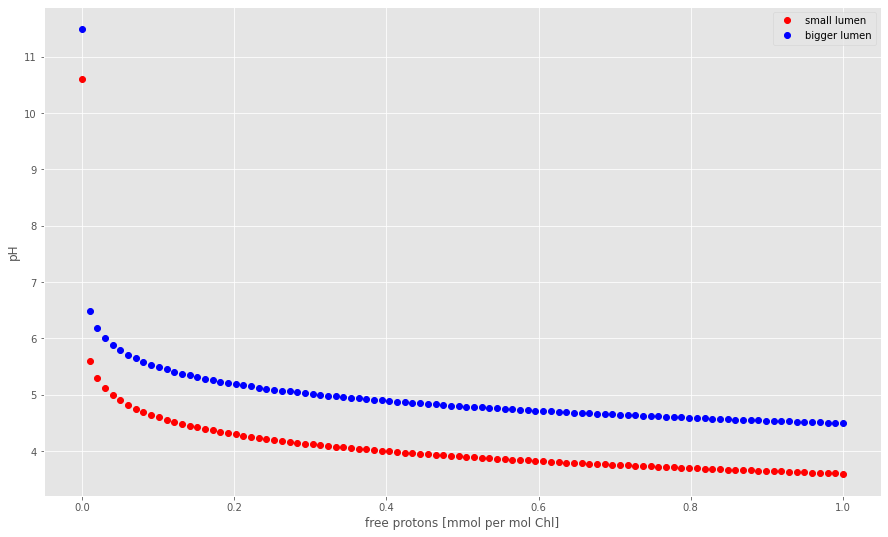

In [16]:
def pHo(H):
    return -np.log10(H*2.5e-4)

def pH(H):
    "assumed bigger lumen by changing the volume"
    return -np.log10(H*3.2e-5)


plt.figure()
    
label_added =False
for x in np.linspace(0.0000001,1, 100):
    if not label_added:
        plt.plot(x, pHo(x), 'ro', label= 'small lumen')
        plt.plot(x, pH(x), 'bo', label = 'bigger lumen')
        label_added = True
    else:
        plt.plot(x, pHo(x), 'ro')
        plt.plot(x, pH(x), 'bo') 

plt.legend()
plt.ylabel('pH')
plt.xlabel('free protons [mmol per mol Chl]')
plt.show()

## pH and cpfd functions

In [17]:
def pH(H):
    "assumed bigger lumen by changing the volume"
    return -np.log10(H*3.2e-5)

def pHinv(pH):
    return 3.125e4 * 10 ** -pH

#def pH(H):
#    return -np.log10(H*2.5e-4)
#
#def pHinv(pH):
#    return 4e3 * 10 ** (-pH)

def cpfdf(PFD):
    """cpfd function for Arabidopsis thaliana"""
    cpfd =  0.0005833 * PFD**2 + 0.2667 * PFD + 187.5
    return cpfd

## Derived parameters

In [18]:
M16model.add_derived_parameter(
    parameter_name="RT", function=lambda r, t: r * t, parameters=["R", "T"])

def _KeqQAPQ(F, E0QAQAm, E0PQPQH2, pHstroma, RT):
    DG1 =  -F*E0QAQAm 
    DG2 = -2*F*E0PQPQH2 + 2*pHstroma * np.log(10) * RT 
    DG0 = -2*DG1 + DG2
    Keq = np.exp(-DG0/RT)
    return Keq

M16model.add_derived_parameter(
    parameter_name = "KeqQAPQ", function=_KeqQAPQ, parameters=["F", "E0QAQAm", "E0PQPQH2", "pHstroma", "RT"])

## Auxiliary functions

In [19]:
def ps2states(P, Q, light, PQtot, kPQred, KeqQAPQ, kH0, kH, kF, kP, PSIItot):
    """Calculates the states of photosystem II
    
    accepts:
    P: reduced fraction of PQ pool (PQH2)
    Q: Quencher
    
    returns:
    B: array of PSII states
    """
    
    Bs = []
    Pox = PQtot - P
    b0 = (light + kPQred*P/KeqQAPQ)
    b1 = (kH0 + kH * Q + kF)
    b2 = kH0 + kH * Q + kF + kP
    
    for Pox,b0,b1,b2 in zip(Pox,b0,b1,b2):
        A = np.array([
        [-b0,        b1,         kPQred*Pox,                0], #B0
        [light,     -b2,         0,                         0], #B1
        [0,         0,          light,                   -b1], #B3
        [1,          1,          1,                         1]
        ])
        
        b = np.array([0,0,0,PSIItot])
        B0,B1,B2,B3 = np.linalg.solve(A,b)
        Bs.append([B0, B1, B2, B3])
    return np.array(Bs).T


def Keqcytb6f(H, F, E0PQPQH2, RT, E0PCPCm, pHstroma):
    """Equilibriu constant of Cytochrome b6f"""
    DG1 = -2*F*E0PQPQH2 + 2 * RT * np.log(10) * pH(H)
    DG2 = -F*E0PCPCm
    DG3 = RT*np.log(10)*(pHstroma - pH(H))
    DG = -DG1 + 2*DG2 + 2*DG3
    Keq = np.exp(-DG/RT)
    return Keq
    
    
def KeqATPsyn(H, DG0ATP, pHstroma, RT, Pi):
    """Equilibrium constant of ATP synthase. For more
    information see Matuszynska et al 2016 or Ebenhöh et al. 2011,2014
    """
    DG = DG0ATP - np.log(10) * (pHstroma-pH(H)) * (14/3)  * RT
    Keq = Pi * np.exp(-DG/RT) 
    return Keq

def Fluorescence(P, Q, B0, B2, light, PQtot, kPQred, KeqQAPQ, kH0, kH, kF, kP, PSIItot):
    """Fluorescence function"""
    Fluo =  kF/(kH0+kH*Q + kF + kP) * B0 + kF/(kH0+kH*Q + kF) * B2
    return Fluo

def Quencher(Dt, H, gamma0):
    """rate of quenching (kH = kH0 + kH*Dt)
    
    accepts: 
    Pr: fraction of non-protonated PsbS protein
    V: fraction of Violaxanthin
    """       
    #Q = gamma0 * (7.8-pH(H)) * Dt 
    Q = gamma0 * Dt

    return Q

## Conserved quantities

In [20]:
def pqmoiety(P, PQtot):
    return [PQtot - P]

def atpmoiety(A, APtot):
    return [APtot - APtot]

def xcycmoiety(Dd, Xtot):
    return [Xtot - Dd]

# Rate equations

In [21]:
def vps2(B1, kP): 
    """Reduction of PQ due to ps2"""
    v = kP * 0.5 * B1
    return v
    
    
def vPQox(P, H, light, kCytb6f, kPTOX, O2ex, PQtot, F, E0PQPQH2, RT, E0PCPCm, pHstroma):
    """Oxidation of the PQ pool through cytochrome and PTOX"""
    kPFD = kCytb6f * light
    kPTOX = kPTOX * O2ex 
    Keq = Keqcytb6f(H, F, E0PQPQH2, RT, E0PCPCm, pHstroma)
    a1 = kPFD * Keq/ (Keq + 1)  
    a2 = kPFD/(Keq + 1)
    v = (a1 + kPTOX) * P - a2 * (PQtot - P)
    return v
    
    
def vATPsynthase(A, H, E, kATPsynthase, DG0ATP, pHstroma, RT, Pi, APtot):
    """Production of ATP by ATPsynthase"""
    v = E**2 * kATPsynthase * (APtot - A - A/KeqATPsyn(H, DG0ATP, pHstroma, RT, Pi))
    return v
    
    
def vATPactivity(E, light,  kActATPase,  kDeactATPase):
    """Activation of ATPsynthase by light"""
    switch = light > 0.1
    v = kActATPase * switch * (1 - E) - kDeactATPase * (1-switch) * E
    return v
    
    
def vLeak(H, kleak, pHstroma):
    """Transmembrane proton leak"""
    v = kleak * (H - pHinv(pHstroma))
    return v
    
    
def vATPcons(A, kATPconsumption):
    """ATP consuming reaction"""
    v = kATPconsumption * A
    return v
    
    
def vXcyc(V, H, nHX, KphSatZ, kDeepoxV, kEpoxZ, Xtot):
    """Xanthophyll cycle"""
    
    a = H**nHX / (H**nHX + pHinv(KphSatZ)**nHX)
    v = kDeepoxV * a * V - kEpoxZ * (Xtot - V)# * (1-a)
    return v
    


## Algebraic modules

In [22]:
M16model.add_algebraic_module(
    module_name = "P_am",
    function = pqmoiety,
    compounds = ["P"],
    derived_compounds = ["Pox"],
    parameters = ["PQtot"])


M16model.add_algebraic_module(
    module_name = "A_am",
    function = atpmoiety,
    compounds = ["A"],
    derived_compounds = ["ADP"],
    parameters = ["APtot"])


M16model.add_algebraic_module(
    module_name = "X_am",
    function = xcycmoiety,
    compounds = ["Dd"],
    derived_compounds = ["Dt"],
    parameters = ["Xtot"])


M16model.add_algebraic_module(
    module_name = "Quencher",
    function = Quencher,
    compounds = ["Dt", "H"],
    derived_compounds = ["Q"],
    parameters = ["gamma0"])


M16model.add_algebraic_module(
    module_name = 'PSIIstates',
    function = ps2states,
    compounds = ["P", "Q"],
    derived_compounds = ["B0", "B1", "B2", "B3"],
    parameters = ["pfd", "PQtot", "kPQred",
                  "KeqQAPQ", "kH0", "kH", "kF", "kP", "PSIItot"])


M16model.add_algebraic_module(
    module_name = "Fluorescence",
    function = Fluorescence,
    compounds = ["P", "Q", "B0", "B2"], #WATCH OUT proportional to the previous state
    derived_compounds = ["Fluo"],
    parameters = ['pfd', 'PQtot', 'kPQred', 'KeqQAPQ',
                  'kH0', 'kH', 'kF', 'kP', 'PSIItot'])

# Mock module to get Light vector over all simulated time points
M16model.add_algebraic_module(
    module_name = "L",
    function = lambda X, PFD: PFD ,
    compounds = ["P"],
    derived_compounds = ["L"],
    parameters = ['pfd'])

## Adding reactions to the model

In [23]:
M16model.add_reaction(
        rate_name = "vps2",
        function = vps2,
        dynamic_variables=["B1"],
        stoichiometry = {"P":1,"H":2/pars["bH"]},
        parameters = ["kP"])


M16model.add_reaction(
        rate_name = "vPQox",
        function = vPQox,
        dynamic_variables = ['P','H'],
        stoichiometry = {"P":-1,"H":4/pars["bH"]},
        parameters = ["pfd", "kCytb6f", "kPTOX", "O2ex",
                          "PQtot", "F", "E0PQPQH2", "RT", "E0PCPCm",
                          "pHstroma"])

    
M16model.add_reaction(
        rate_name = "vATPsynthase",
        function = vATPsynthase,
        dynamic_variables = ["A","H","E"],
        stoichiometry = {"A":1, "H": (-14/3)/pars["bH"]},
        parameters = ["kATPsynthase", "DG0ATP", "pHstroma",
                      "RT", "Pi", "APtot"])
    
    
M16model.add_reaction(
        rate_name = "vATPactivity",
        function = vATPactivity,
        dynamic_variables = ["E"],
        stoichiometry = {"E":1},
        parameters = ["pfd",  "kActATPase",  "kDeactATPase"])


M16model.add_reaction(
        rate_name = "vLeak",
        function  = vLeak,
        stoichiometry = {"H": -1/pars["bH"]},
        parameters = ["kleak", "pHstroma"])


M16model.add_reaction(
        rate_name = "vATPcons",
        function = vATPcons,
        stoichiometry = {"A":-1},
        parameters = ["kATPconsumption"])


M16model.add_reaction(
        rate_name = "vXcyc",
        function = vXcyc,
        dynamic_variables = ['Dd','H'],
        stoichiometry = {"Dd": -1},
        parameters = ["nHX", "KphSatZ", "kDeepox",
                      "kEpox", "Xtot"])



# Double check the stoichiometric matrix of the model

In [24]:
M16model.get_stoichiometric_df()

vATPactivity  vATPcons  vATPsynthase  vLeak  vPQox  vXcyc  vps2
A            0.0      -1.0      1.000000   0.00   0.00    0.0  0.00
Dd           0.0       0.0      0.000000   0.00   0.00   -1.0  0.00
E            1.0       0.0      0.000000   0.00   0.00    0.0  0.00
H            0.0       0.0     -0.046667  -0.01   0.04    0.0  0.02
P            0.0       0.0      0.000000   0.00  -1.00    0.0  1.00

## Helper function to automaticaly derive NPQ parameters from my simulations
by Tim

In [25]:
def get_NPQ(F, t, lights, maxlight=5000):
    r"""Extracts important points of the PAM simuations.

    get_NPQ calculates important points of the PAM simulation such as Fm, Fm', Ft', Fo
    Moreover, the NPQ values are calcuated.

    Parameters
    ----------
    F : numpy.array or list
        Simulated fluorescence values of PAM experiment
    t : numpy.array or list
        Time points of simulated PAM experiment
    lights : numpy.array or list
        PFD values for each time point
    maxlight : int 
       PFD of saturating light impuls
    

    Returns
    -------
    Fm : list
        Fm (first element of list) and Fm' values
    NPQ : list
        Calculated NPQ values
    tm : list
        Exact time points of peaks in PAM trace
    Fo : list
        Fo (first element of list) and Ft' values
    to : list
        Exact time points of Fo and Ft' values
     
    """
    z = [] #container for lists. Each list contains the positions of fluorescence values for one peak 
    o = [] #container for position of Fo'
    cnt = 0
    while cnt < len(lights):
        if lights[cnt] == maxlight:
            h = [] #temporary container for all F==maxlight. For each peak it is renewed
            while cnt != len(lights) and lights[cnt] == maxlight:
                h.append(cnt)
                cnt += 1
            z.append(h)
            o.append(h[0]-1) #value directly at the bottom of peak is Fo
        else:
            cnt += 1
    peaks = [i[np.argmax(F[i])] for i in z] #Fm is the maximal value for each peak sequence
    Fm = F[peaks]
    tm = t[peaks]
    Fo = F[o]
    to = t[o]
    NPQ = (Fm[0] - Fm)/Fm
    return Fm, NPQ, tm, Fo, to   

## Run dark-adaptation
To simulate the dark adapted state of the system I run it in almost darkness for 1000 seconds.
Light is set to 0.1 instead of 0 due to the numeric errors occuring with light set completely to zero, and H is super sensitive for even small perturbations.

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f703a74c240>)

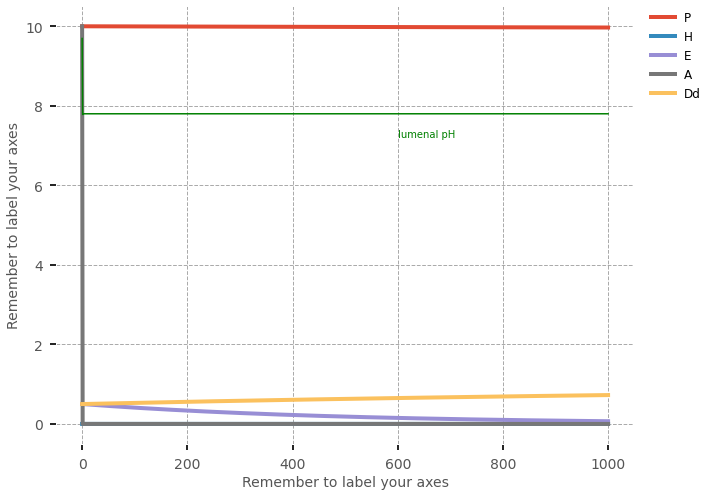

In [27]:
y0d =  {"P": 10., "H": 6.32975752e-06, "E": 0.5, "A": 10.0, "Dd": 0.5}

s = Simulator(M16model)
s.initialise(y0d)
s.update_parameters({'kPTOX': 0.0,
                    'kDeepox': 6e-4,
                    'kEpox': 6e-4,
                    'KphSatZ': 6.3,
                    'kH0': 5e8,
                    'kleak':1000
                    })
s.update_parameter('pfd', 0.0001)
s.simulate(1000,  steps=1000, **{"rtol":1e-16,"atol":1e-8, "maxnef": 20, "maxncf":10})


s.plot_selection(['P','H', 'E','A','Dd'])
plt.plot(s.get_time(), pH(s.get_variable('H')), 'g')
ax = plt.gca()
ax.annotate('lumenal pH', xy=(600, 7.2), color='g')
s.plot_selection(['B0', 'B1', 'B2', 'B3'])


### important: Make sure the tolerance level is increased to the decimal point due to small changes in H concentration

In [28]:
y0d = s.get_variables(['P', 'H', 'E', 'A', 'Dd'])[-1]
print(y0d)

[9.96908633e+00 4.95750019e-04 6.76676340e-02 2.12795337e-06
 7.25588538e-01]


In [29]:
pH(5.56305981e-04)

7.749536292493656

## Run light scan and read out de-epoxidation state

In [30]:
plt.figure()
for ll in [10, 50, 100, 250, 500, 750, 1000, 1500, 2000]:
    print(ll)
    s = Simulator(M16model)
    s.initialise(y0d)
    s.update_parameters({'kPTOX': 0.0,
                    'kDeepox': 10e-4,
                    'kEpox': 6e-4,
                     'KphSatZ': 6.3
                        })
    s.update_parameter('pfd', ll)
    s.simulate(60*60, steps=3600)
    plt.plot(ll, s.get_variable('Dt')[-1]*100, 'ro')
plt.xlabel('Light intensity ($\mu$mol photons.m${^-2}$.s$^{-1}$)')
plt.ylabel('De-epoxidation state (%)')

10
50
100
250
500
750
1000
1500
2000


Text(0, 0.5, 'De-epoxidation state (%)')

# Fv/Fm
I see from the experimental results that our Fv/Fm is way too high
Which rate is different in diatoms? photochemistry or heat dissipation dur to conformational stage?

In [31]:
fvfm = M16model.get_parameter('kP')/(M16model.get_parameter('kF')+M16model.get_parameter('kH0')+M16model.get_parameter('kH')*0+M16model.get_parameter('kP'))
print(fvfm)

0.8163265306122449


In [32]:
pars['kActATPase']

0.01

# PAM experiment dark-HL->LL

In [68]:
pfd = 1250
y0 =  {"P": 1., "H": 5.56305280e-04, "E": 0., "A": .1, "Dd": 1.}



s = Simulator(M16model)
s.initialise(y0)
s.update_parameters({'kPTOX': 0.0,
                     'kActATPase': 0.01,
                    'kDeepox': 6e-4,
                    'kEpox': 6e-2,
                    'KphSatZ': 6.3,
                    'kH0': 5e8,
                    'kleak':10.
                    })

dT = 15
t = 0
while t < 60 :   
    #turn on the saturating pulse of light of Tflash length
    if t%dT == 0:
        s.update_parameter('pfd', 10000)
        s.simulate(t+0.8, steps=100)
    else:
        #switch on the light except for the dark period
        s.update_parameter('pfd', pfd)
        new_t = t+dT-0.8
        s.simulate(new_t, steps=dT, **{"atol":1.0e-10})  #I needed to make it smaller from the default, otherwise integration problems  
    t = s.get_time()[-1]   

Tmax=15*60
dT = 30
while t < Tmax :   
    #turn on the saturating pulse of light of Tflash length
    if t%dT == 0:
        s.update_parameter('pfd', 10000)
        s.simulate(t+0.8, steps=100)
    else:
        #switch on the light except for the dark period
        #t+dT-Tflash is the time to the next flash
        if t<7*60: #or (t> 16*60 and t<25*60):
            #put the actinic light
            s.update_parameter('pfd', pfd)            
        else:
            s.update_parameter('pfd', 30.)
        new_t = t+dT-0.8
        s.simulate(new_t, steps=dT, **{"atol":1.0e-10})  #I needed to make it smaller from the default, otherwise integration problems  
    t = s.get_time()[-1]           

# Needs to be normalized s.plot_selection('Fluo')
F = s.get_variable('Fluo')
Fm, NPQ, tm, Fo, to = get_NPQ(s.get_variable('Fluo'), s.get_time(), s.get_variable('L'), 10000)

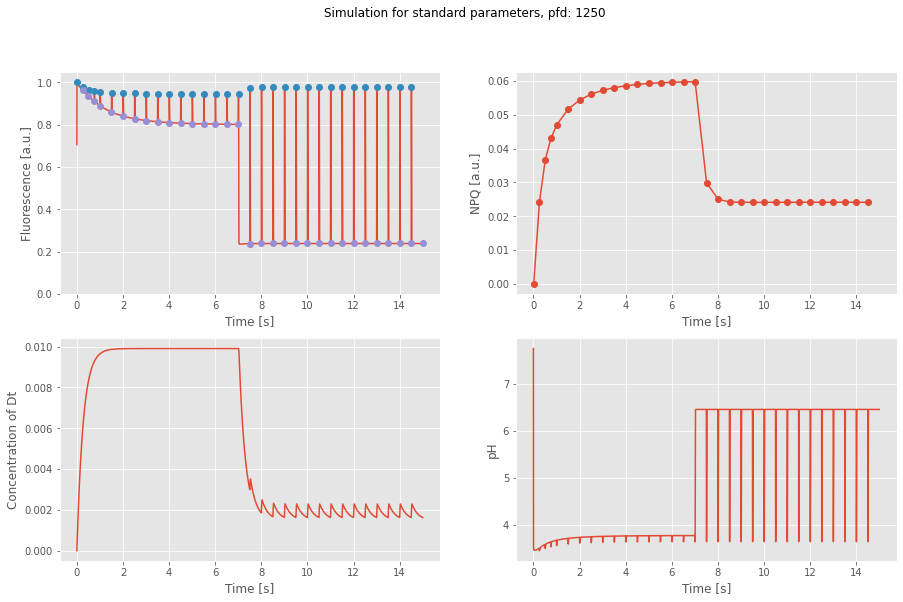

In [69]:
#Plots
plt.figure()
ax1=plt.subplot(221)
plt.plot(s.get_time()/60., F/max(F))
plt.plot(tm/60.,Fm[0:]/max(F),'o')
plt.plot(to/60.,Fo/max(F),'o')
plt.ylim(0, 1.05)
plt.xlabel('Time [s]')
plt.ylabel('Fluorescence [a.u.]')

fig2 = plt.subplot(222, sharex=ax1)
plt.plot(tm/60.,NPQ,'o-')
plt.xlabel('Time [s]')
plt.ylabel('NPQ [a.u.]')

fig3 = plt.subplot(223)
plt.plot(s.get_time()/60., s.get_variable('Dt'))
plt.xlabel('Time [s]')
plt.ylabel('Concentration of Dt')

fig4 = plt.subplot(224, sharex=fig3)
plt.plot(s.get_time()/60., pH(s.get_variable('H')))
plt.xlabel('Time [s]')
plt.ylabel('pH')

plt.suptitle('Simulation for standard parameters, pfd: ' + str(pfd))
plt.show()

In [35]:
plt.figure()
plt.plot(NPQ, [s.get_variable('Dt')[i] for i in [list(s.get_time()).index(x) for x in tm]])
plt.ylabel('[Dt]')
plt.xlabel('NPQ')

Text(0.5, 0, 'NPQ')

## Effect of KEA3 
Assumption: KEA3 increases protons leak
KO: reduce the leak
OE: increase. initially check increase by 10% and doubling

No handles with labels found to put in legend.


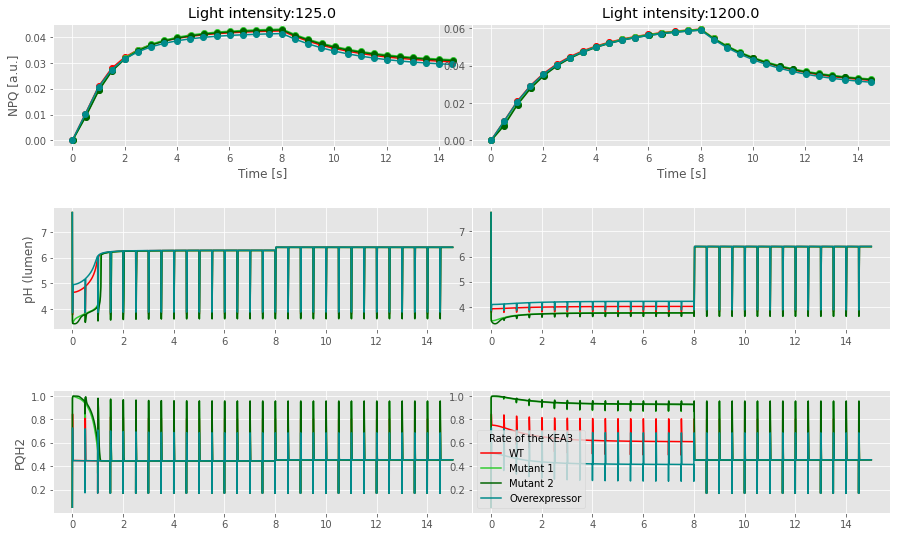

In [72]:
#y0d =  {"P": 5., "H": 6.32975752e-05, "E": 0., "A": 21.0, "Dd": 1.}

# Simulation with switched off oxygen, not light

leak_var = {'WT': 1000, 
            'Mutant 1': 10.,
            'Mutant 2': .1,
            'Overexpressor': 2000.
           }

pfd_var = [125., 1200.]

dT = 30
Tmax=15*60
cnt = 0

fig, axs = plt.subplots(3, 2, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
axs[0].set_ylabel('NPQ [a.u.]')
axs[2].set_ylabel('pH (lumen)')
axs[4].set_ylabel('PQH2')

for light in pfd_var:
    axs[cnt].set_title('Light intensity:' + str(light))
    for leak in leak_var.keys():
        s = Simulator(M16model)
        s.initialise(y0)
        s.update_parameters({'kleak': leak_var[leak],
                   'kPTOX': 0.0,
                     'kActATPase': 0.01,
                    'kDeepox': 6e-5,
                    'kEpox': 6e-3,
                    'KphSatZ': 6.3,
                    'kH0': 5e8,
                    })

        t = 0.0
        while t < Tmax :   
            #turn on the saturating pulse of light of Tflash length
            if t%dT == 0:
                s.update_parameter('pfd', 10000)
                s.simulate(t+0.8)
            else:
                #switch on the light except for the dark period
                #t+dT-Tflash is the time to the next flash
                if t>8*60:
                    s.update_parameter('pfd', 50.)
                else:
                    #put the actinic light
                    s.update_parameter('pfd', light)
                new_t = t+dT-0.8
                s.simulate(new_t, steps=dT, **{"atol":1.0e-10})  #I needed to make it smaller from the default, otherwise integration problems  
            t = s.get_time()[-1]   
        F = s.get_variable('Fluo')
        Fm, NPQ, tm, Fo, to = get_NPQ(s.get_variable('Fluo'), s.get_time(), s.get_variable('L'), 10000)

        #plt.plot(s.get_time(), F/max(F))
        #plt.plot(tm,Fm[0:]/max(F),'o')
        #plt.plot(to,Fo/max(F),'o')
        #plt.xticks(ticks=[0, 2*60, 4*60, 6*60, 8*60, 10*60, 12*60, 14*60], labels=[0,2,4,6,8,10,12,14])
        #plt.xlabel('Time [s]')
        #plt.ylabel('Fluorescence [a.u.]')
        
        axs[cnt].plot(tm/60., NPQ,'o-', label=leak, color=colpal[leak])
        axs[cnt].set_xlabel('Time [s]')


        axs[cnt+2].plot(s.get_time()/60., pH(s.get_variable('H')), label=leak, color=colpal[leak])

        axs[cnt+4].plot(s.get_time()/60., s.get_variable('P')/pars['PQtot'], label=leak, color=colpal[leak])
        #plt.ylim(0,1)

    cnt+= 1
    plt.legend(title='Rate of the KEA3')
plt.show()

In [33]:
y0d

array([9.96908668e+00, 4.95750020e-04, 6.76676365e-02, 2.12795078e-06,
       7.25594179e-01])

17 June 2020
--------

- Include photodamage? Might play a role in the different relaxation kinetics in the darkness
https://www.sciencedirect.com/science/article/pii/S0005272812010870

In [34]:
M16model.add_compound('PS2')

M16model.add_parameters({'kdam': 100, #1e-7,
                         'krec': 5.55e-4, #1e-4,
                        })

def vps2turnover(PS2, B3, PSIItot, kdam, krec):
    ''' we assume that the photodamage comes from the photoinhibition of the excited, closed RC'''
    return kdam * B3 - krec * (1 - PS2/PSIItot)


M16model.add_reaction(
        rate_name = "vps2turnover",
        function = vps2turnover,
        dynamic_variables=["PS2", "B3"],
        stoichiometry = {"PS2":-1},
        parameters = ["PSIItot", "kdam", "krec"])

In [35]:
M16model.get_compounds()

['P', 'H', 'E', 'A', 'Dd', 'PS2']

In [36]:
y0d =  {"P": 1.25855941e-01, "H": 5.56305981e-04, "E": 6.76674759e-02, 
        "A": 3.62860548e-06, "Dd": 9.99999995e-01, "PS2": 2.5}

# Simulation with switched off oxygen, not light

leak_var = {'WT': 1000, 
            'Mutant 1': 10.,
            'Mutant 2': .1,
            'Overexpressor': 2000.
           }

pfd_var = [125., 500, 1200.]

dT = 30
Tmax=15*60
cnt = 0

fig, axs = plt.subplots(3, 3, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
axs[0].set_ylabel('NPQ [a.u.]')
axs[3].set_ylabel('pH (lumen)')
axs[6].set_ylabel('PQH2')

for light in pfd_var:
    axs[cnt].set_title('Light intensity:' + str(light))
    for leak in leak_var.keys():
        s = Simulator(M16model)
        s.initialise(y0d)
        s.update_parameters({'kleak': leak_var[leak],
                             'kDeepox': 0.004,
                             'kEpox': 0.05,
                             'KphSatZ': 6.3,
                             'kP': 1.2e9})
        t = 0.0
        while t < Tmax :   
            #turn on the saturating pulse of light of Tflash length
            if t%dT == 0:
                s.update_parameter('pfd', 10000)
                s.simulate(t+0.8)
            else:
                #switch on the light except for the dark period
                #t+dT-Tflash is the time to the next flash
                if t>8*60:
                    s.update_parameter('pfd', 50.)
                else:
                    #put the actinic light
                    s.update_parameter('pfd', light)
                new_t = t+dT-0.8
                s.simulate(new_t, steps=dT, **{"atol":1.0e-10})  #I needed to make it smaller from the default, otherwise integration problems  
            t = s.get_time()[-1]   
        F = s.get_variable('Fluo')
        Fm, NPQ, tm, Fo, to = get_NPQ(s.get_variable('Fluo'), s.get_time(), s.get_variable('L'), 10000)

        #plt.plot(s.get_time(), F/max(F))
        #plt.plot(tm,Fm[0:]/max(F),'o')
        #plt.plot(to,Fo/max(F),'o')
        #plt.xticks(ticks=[0, 2*60, 4*60, 6*60, 8*60, 10*60, 12*60, 14*60], labels=[0,2,4,6,8,10,12,14])
        #plt.xlabel('Time [s]')
        #plt.ylabel('Fluorescence [a.u.]')
        
        axs[cnt].plot(tm/60., NPQ,'o-', label=leak, color=colpal[leak])
        axs[cnt].set_xlabel('Time [s]')


        axs[cnt+3].plot(s.get_time()/60., pH(s.get_variable('H')), label=leak, color=colpal[leak])

        axs[cnt+6].plot(s.get_time()/60., s.get_variable('P')/pars['PQtot'], label=leak, color=colpal[leak])
        #plt.ylim(0,1)

    cnt+= 1
    plt.legend(title='Rate of the KEA3')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fb8051f60>)

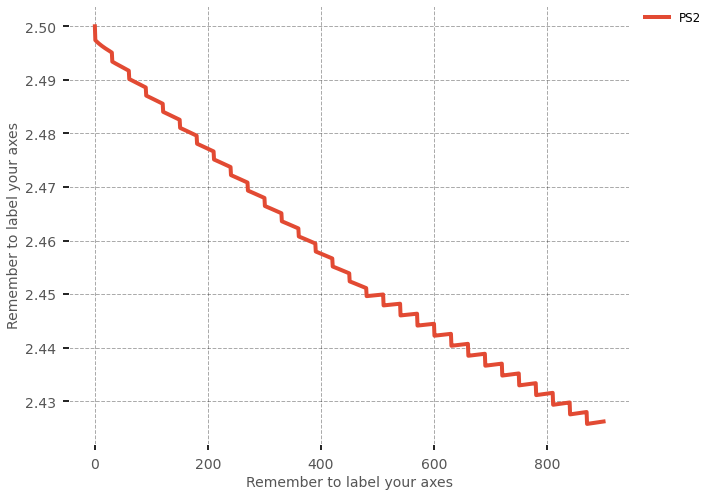

In [37]:
s.plot_selection('PS2')

In [73]:
M16model.get_parameter('kleak')

1000.0

In [39]:
5e8 + 5e9*0.32

2100000000.0

In [40]:
5e9*0.32

1600000000.0